# Final Challenge Code:Nation Data Science
***

> ## Purpose:
The purpose of this product is to provide an automated service that recommends leads to a user given their current customer list (Portfolio).

***
## Description of steps:
- Load and treat data:
> - Import Libraries and files;
> - Load Pipeline;
> - Train test data;
- Organization of Datasets treated for models;
- Prediction models:
> - Models;
> - Benchmarking;
> - Apply the best model;
- Recommendation:
> - Total of possible customers;
> - Ranking by centroid value;
> - Recommendations Outputs;
- Result analysis:
> - Portfolio x prediction graphs;
> - Verify similar features values;
- Extras:
> - Recomendation filtered by portfolio values;
> - Companies with tax, legal, financial or operational issues;
- All Outputs.

***
> ***
***
# Load and treat data:

***
## Import Libraries and Files:

> ### Packages:

In [1]:
# Data handling:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# models: 
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
# Metrics:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.spatial import distance
# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

In [2]:
#Adjust for visualization:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

***
## Load data and apply Pipeline

In [3]:
# Import Data treatment function:
import data_treatment

In [4]:
# Run Treatment and load data:
df = data_treatment.fetch_market(2)

In [5]:
# Adjust for viewing:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', len(df.columns))
pd.set_option('display.max_rows', len(df))

In [6]:
# Rows and columns:
df.shape

(460371, 315)

In [7]:
# Client count:
df['cliente_flag'].value_counts()

0    459805
1    566   
Name: cliente_flag, dtype: int64

In [8]:
# View head:
df.head(2)

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,qt_filiais,dt_situacao_numeric,dt_situacao_year,de_saude_rescencia_label,de_saude_tributaria_label,de_nivel_atividade_label,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA,de_natureza_juridica_SERV

In [9]:
# Transform index to column
df.reset_index(level=0, inplace=True)
df.head(2)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,qt_filiais,dt_situacao_numeric,dt_situacao_year,de_saude_rescencia_label,de_saude_tributaria_label,de_nivel_atividade_label,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA,de_natureza_juridica_S

In [10]:
# Generate Dataframes:
# Market:
market = df.copy()
# Portfolio
portfolio = market[market['cliente_flag'] == 1]
# Market without portfolio
market_without_clients = market[market['cliente_flag'] == 0]

***
## Train and test data:

> ### Create dataset for train and test:

In [11]:
# random value
random_vl=42
# Function to generate non-clients sample
def make_surrogate(df,samples):
    mod_df=pd.DataFrame(columns=df.columns)
    #random.seed(1)
    #seed=np.random.randint(1,10000,size=len(df.columns))
    count_seed=0
    for i in df.columns:
        mod_df[i]=np.array(df[i].sample(n=samples, random_state=random_vl,replace=True))
        count_seed += 1
    return mod_df

In [12]:
# Number of clients:
num_clients = len(portfolio)
# generate non-clients sample balance dataset of train/test: 
non_clients_sample = make_surrogate(market_without_clients,num_clients)
# Create dataset with clients and non-clients:
frames = [portfolio, non_clients_sample ]
dataset = pd.concat(frames)
# Drop not treated data (original data):
not_treated_data = df.select_dtypes("object").columns
dataset = dataset.drop(not_treated_data, axis = 1)
# Dataset train and test:
dataset.head(2)

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,qt_filiais,dt_situacao_numeric,dt_situacao_year,de_saude_rescencia_label,de_saude_tributaria_label,de_nivel_atividade_label,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA,de_natureza_juridica_SERVICO NOTARIAL E REGISTRAL CARTORIO,de_natureza_juridica_SERVICO SOCIAL AUTONOMO,de_natureza_juridica_SOCIEDADE ANONIMA ABE

In [13]:
# Count clients:
dataset['cliente_flag'].value_counts()

1    566
0    566
Name: cliente_flag, dtype: int64

***
> ***
***
# Organization of Datasets treated for models;

> ***
- Market with treated data : market
- Portfolio with treated data: portfolio
- Market without portfolio data: market_without_clients
- Treated dataset for train/test: dataset
> ***

***
> ***
***
# Prediction models:

## Models:

> ### Cross validation:

In [14]:
# random value
random_vl=42
# Kfold to compare models:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
kfold = KFold(n_splits=3, random_state=random_vl) 

In [15]:
# Inputs for models:
X_data = dataset.drop(['cliente_flag'], axis = 1)
Y_target = dataset['cliente_flag']

> ### KNN Classifier:

In [16]:
# Model:
knn_cl = KNeighborsClassifier(n_neighbors=1)

> ### Decision Tree:

In [17]:
# Model:
dtree = DecisionTreeClassifier(random_state = random_vl)

> ### SVM:

In [18]:
# Model:
svm_svc = SVC(gamma='auto', random_state = random_vl)

***
## Benchmark:

In [19]:
# Comparative DataFrame:
performance = []
accuracy=[]
classifier = ['KNN', 'Decision Tree', 'SVM']
models = [knn_cl, dtree, svm_svc]
models_name = ['knn_cl', 'dtree', 'svm_svc']
for i in models:
    model = i
    cv_result = cross_val_score(model,X_data, Y_target, cv = kfold, scoring = "accuracy")
    performance.append(cv_result.mean())
    accuracy.append(cv_result)
        
models_dataframe=pd.DataFrame(performance,index = classifier)   
models_dataframe.columns = ['Accuracy']
models_dataframe['Model_name'] = models_name
models_dataframe['Model_description'] = models
models_dataframe

,Accuracy,Model_name,Model_description
KNN,0.924941,knn_cl,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=1, p=2,\n weights='uniform')"
Decision Tree,0.991175,dtree,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n splitter='best')"
SVM,0.956732,svm_svc,"SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n max_iter=-1, probability=False, random_state=42, shrinking=True,\n tol=0.001, verbose=False)"


In [20]:
# # Best model:
best_model = models_dataframe.Model_description[models_dataframe['Accuracy'] == models_dataframe['Accuracy'].max()].tolist()
best_model = best_model[0]
print(models_dataframe['Model_description'].iloc[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


***
## Apply the best model:

> ### Predict

In [21]:
# Complete market with customers, non-customers and all data treated:
market_to_predict = market.drop(not_treated_data, axis = 1)
market_to_predict = market_to_predict.drop(['cliente_flag'], axis = 1)

In [22]:
# Fit train data:
best_model.fit(X_data, Y_target)
# prediction:
pred = best_model.predict(market_to_predict)
# Count predictions:
predicted_market = market.copy()
predicted_market['pred'] = pred
predicted_market['pred'].value_counts()

0    458481
1    1890  
Name: pred, dtype: int64

In [23]:
# confusion matrix:
print (confusion_matrix(market['cliente_flag'],pred))

[[458481   1324]
 [     0    566]]


In [24]:
# Classification report:
print (classification_report(market['cliente_flag'],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    459805
           1       0.30      1.00      0.46       566

   micro avg       1.00      1.00      1.00    460371
   macro avg       0.65      1.00      0.73    460371
weighted avg       1.00      1.00      1.00    460371



In [25]:
# View the top 20 features importances
# Fit train data:
best_model.fit(X_data, Y_target)
features = [col for col in list(X_data) ]
importances =  best_model.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print(sorted_features[0:20])

['vl_faturamento_estimado_aux', 'fl_matriz', 'nm_micro_regiao_JURUA', 'sg_uf_RO', 'de_ramo_COMERCIO POR ATACADO', 'idade_minima_socios', 'de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA', 'de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL', 'de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL', 'de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL', 'de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL', 'de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL', 'de_natureza_juridica_SERVICO SOCIAL AUTONOMO', 'de_natureza_juridica_SERVICO NOTARIAL E REGISTRAL CARTORIO', 'de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL', 'de_natureza_juridica_SOCIEDADE ANONIMA ABERTA', 'de_natureza_juridica_SOCIEDADE ANONIMA FECHADA', 'de_natureza_juridica_SOCIEDADE DE ECONOMIA MISTA', 'de_natureza_juridica_SOCIEDADE EM CONTA DE PARTICIPACAO', 'de_natureza_juridica_SOCIEDADE EMPRESARIA EM COMANDITA 

***

In [26]:
# view predict market
predicted_market.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,qt_filiais,dt_situacao_numeric,dt_situacao_year,de_saude_rescencia_label,de_saude_tributaria_label,de_nivel_atividade_label,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA,de_natureza_juridica_S

***
> ***
***
# Recommendation:

## Total of possible customers:

In [27]:
# Get non-customers predict as customer two or more times: 
recommendation = predicted_market.copy()
recommendation = recommendation[recommendation['pred'] == 1]
# Delete current customers:
recommendation['Tr_exc'] = recommendation['id'].isin(portfolio['id'])
recommendation = recommendation[recommendation['Tr_exc'] != True]
recommendation = recommendation.drop(['Tr_exc'], axis = 1)

In [28]:
print("From a total of %d companies, we found similarities with their portfolio in %d."%(market.shape[0]-len(portfolio), recommendation.shape[0]))

From a total of 459805 companies, we found similarities with their portfolio in 1324.


In [29]:
recommendation.head(2)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,qt_filiais,dt_situacao_numeric,dt_situacao_year,de_saude_rescencia_label,de_saude_tributaria_label,de_nivel_atividade_label,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA,de_natureza_juridica_S

## Ranking by proximity Centroid value:

In [30]:
# Default Customer Creation:
X = market_to_predict
Y = market['cliente_flag']
# Fit Nearest Centroid
nctrd = NearestCentroid()
nctrd.fit(X, Y)
default_customer = list(nctrd.centroids_[1])
# Get distances between centroid value and predictions:
z = recommendation.drop(not_treated_data, axis=1)
z = z.drop(['cliente_flag', 'pred'], axis = 1)
recommendation['dist_centroid'] = z.apply(lambda x: distance.euclidean(x, default_customer), axis=1)
# Order by distance of_centroid:
recommendation = recommendation.sort_values(by='dist_centroid', ascending=True)
# Normalize distance value between 0 and 1
recommendation['dist_centroid_norm'] = (recommendation['dist_centroid'] -0)/(max(recommendation['dist_centroid'] )-0)
# Prob column:
prob = 1 - recommendation['dist_centroid_norm']
recommendation['prob'] = list(prob)
# view Dataframe
recommendation.head(2)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,qt_filiais,dt_situacao_numeric,dt_situacao_year,de_saude_rescencia_label,de_saude_tributaria_label,de_nivel_atividade_label,de_natureza_juridica_AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_COMUNIDADE INDIGENA,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE EMPREGADORES,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_CONSORCIO PUBDE DIREITO PUB ASS PUB,de_natureza_juridica_CONSORCIO PUBLICO DE DIREITO PRIVADO,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE DE MEDIACAO E ARBITRAGEM,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS,de_natureza_juridica_ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,de_natureza_juridica_ESTADO OU DISTRITO FEDERAL,de_natureza_juridica_FRENTE PLEBISCITARIA OU REFERENDARIA,de_natureza_juridica_FUNDACAO PRIVADA,de_natureza_juridica_FUNDACAO PUB DE DIREITO PUB EST OU DO DF,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO FEFERAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PRIVADO MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PRIVADO,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_GRUPO DE SOCIEDADES,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGANIZACAO SOCIAL OS,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO DE DIRECAO REGIONAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO AUTONOMO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO AUTONOMO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL,de_natureza_juridica_ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_REPRESENTACAO DIPLOMATICA ESTRANGEIRA,de_natureza_juridica_S

## Recommendations Outputs:

In [31]:
# Dictionary data:
dictionary = pd.read_csv("dicionario.csv")
# market with original data:
market_original = pd.read_csv("estaticos_market.csv")
# Portfolio with original data:
portfolio_original = pd.DataFrame()
portfolio_original['id'] = portfolio['id']
portfolio_original = pd.merge(portfolio_original, market_original, on='id', how='left')

In [32]:
# Outputs Dataframes
recommendation_ids = recommendation['id']
recomendation_with_original_data = market_original[market_original['id'].isin(recommendation_ids)]
top25_recommendations_ids = recommendation_ids.head(25)
rec_sys_output = recommendation[['id','prob']]

In [33]:
# Uncomment an option bellow with "##" and run this cell to export the dataset to csv file.

# Recomendation with values used in the model:
##recomendation.to_csv('recomendation.csv', index=False)

# Recomendation with original data:
##recomendation_with_original_data.to_csv('recomendation_with_original_data.csv', index=False)

# Recommendation_ids
##recommendation_ids.to_csv('recommendation_ids.csv', index=False)

# Top25_recommendations:
##top25_recommendations_ids.to_csv('top25_recommendations_ids.csv', index=False)

# Output to Cross-Ranking
##rec_sys_output.to_csv('rec_sys_output_pt2.csv', index=False)

***
> ***
***
# Result analysis:

## Portfolio x prediction:

> ### Graphs: 

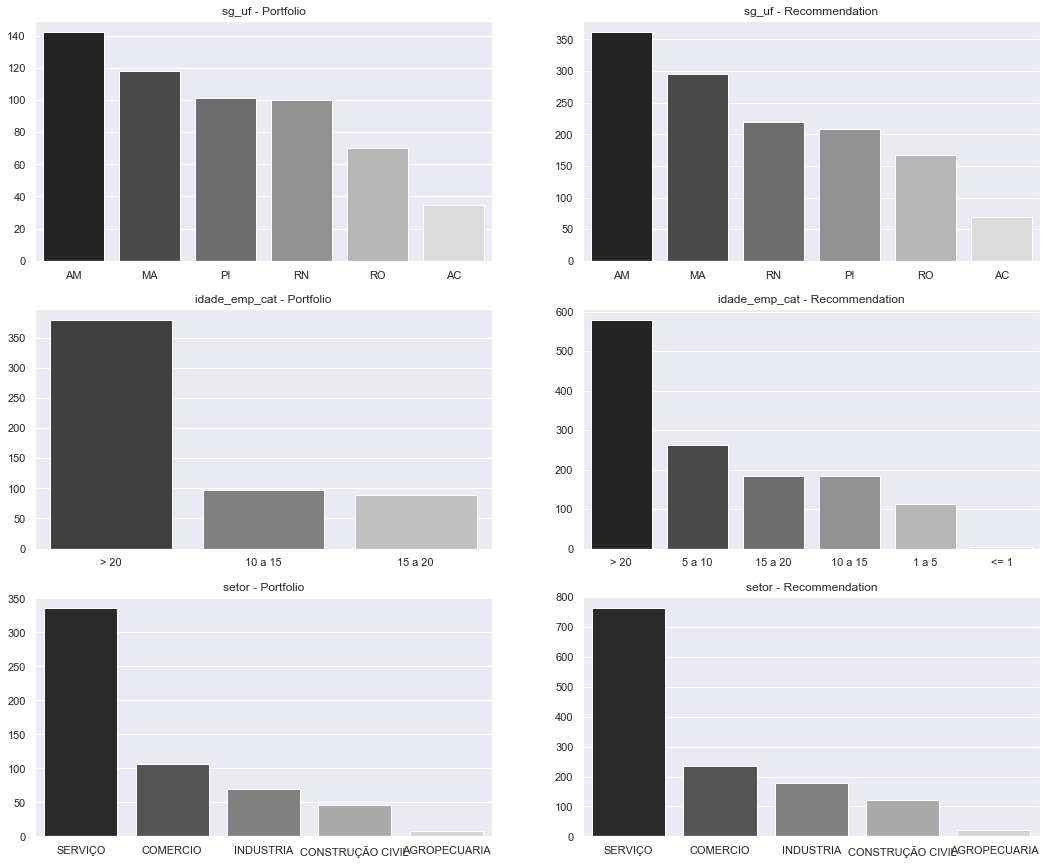

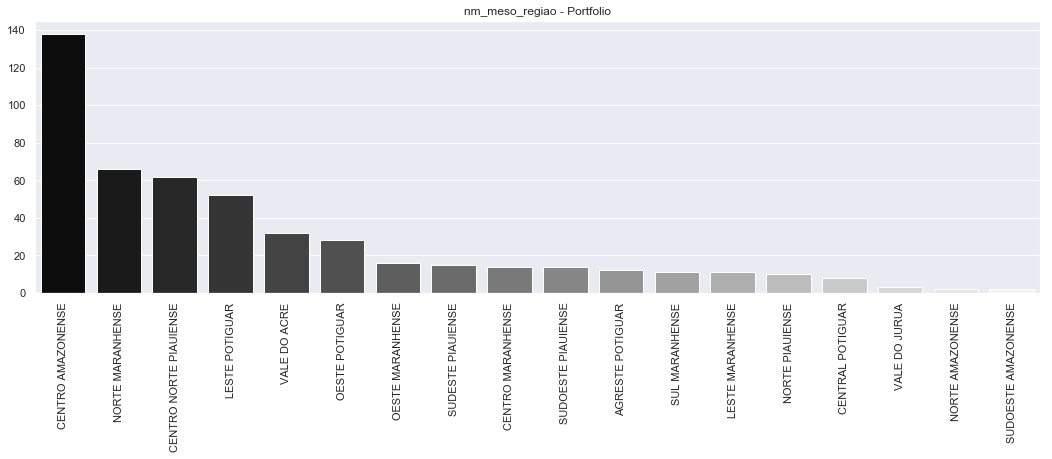

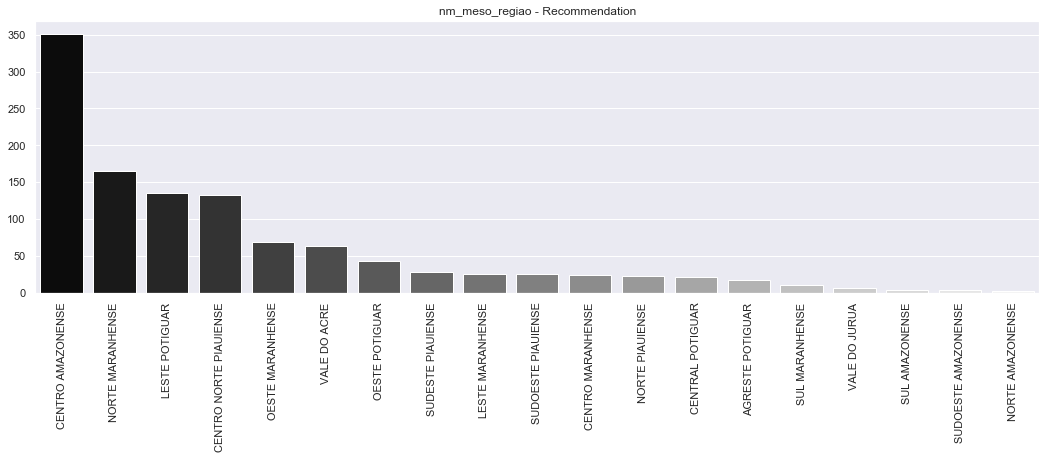

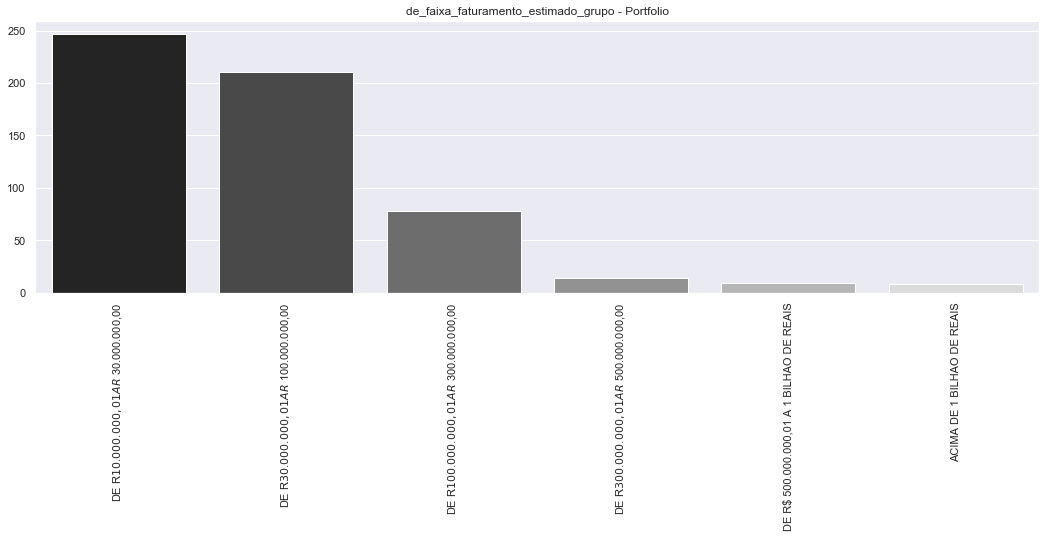

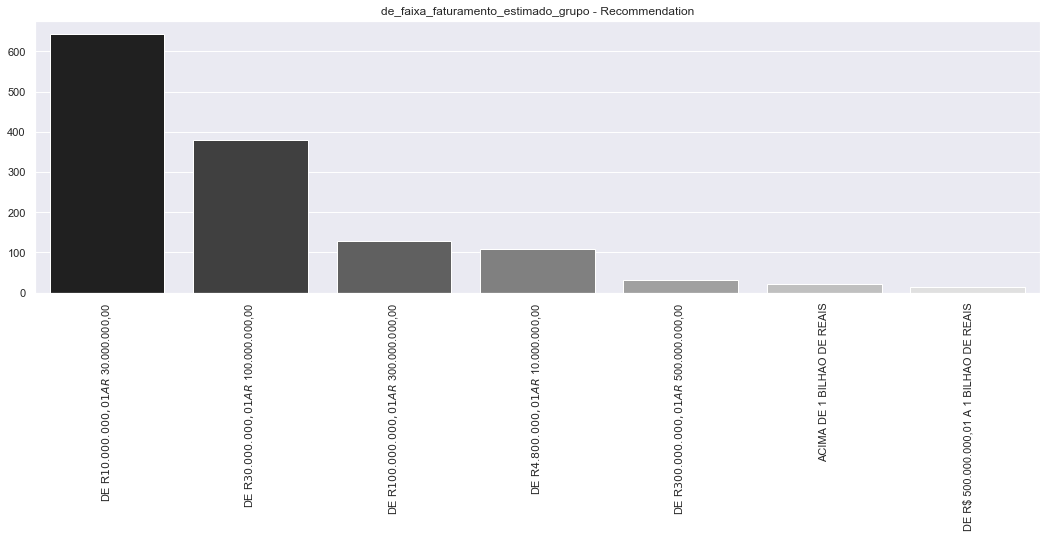

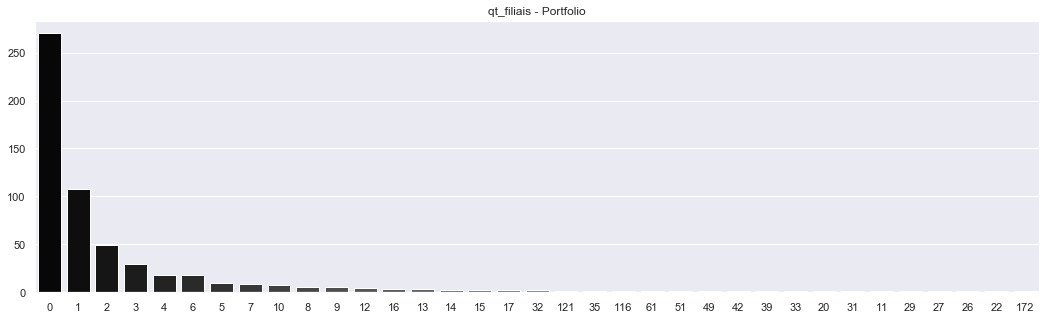

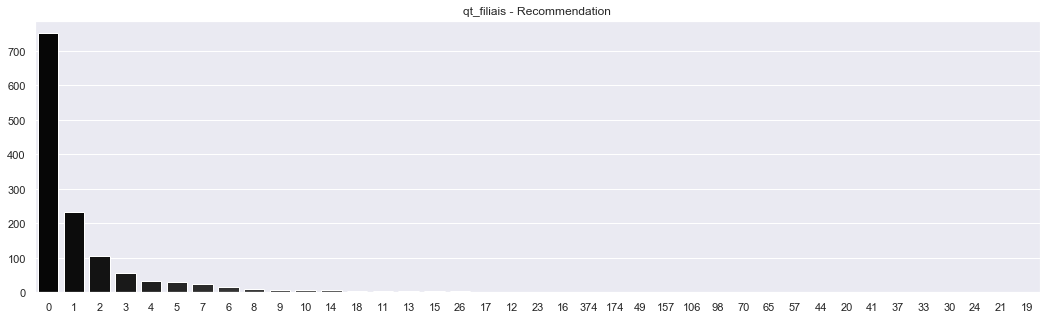

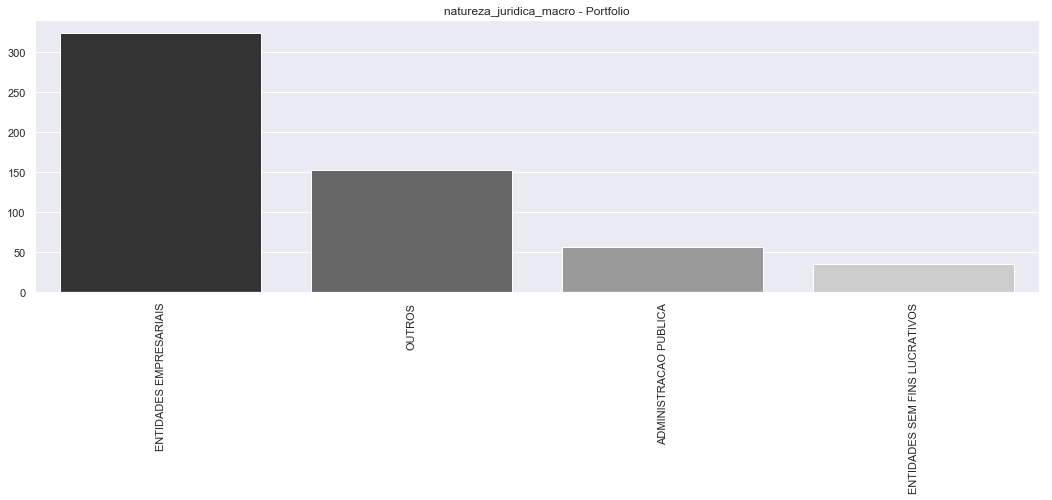

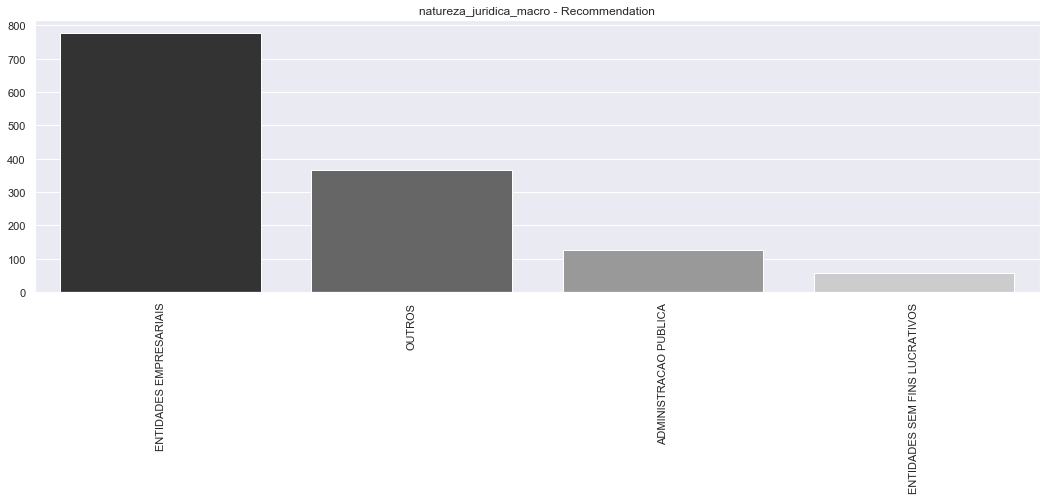

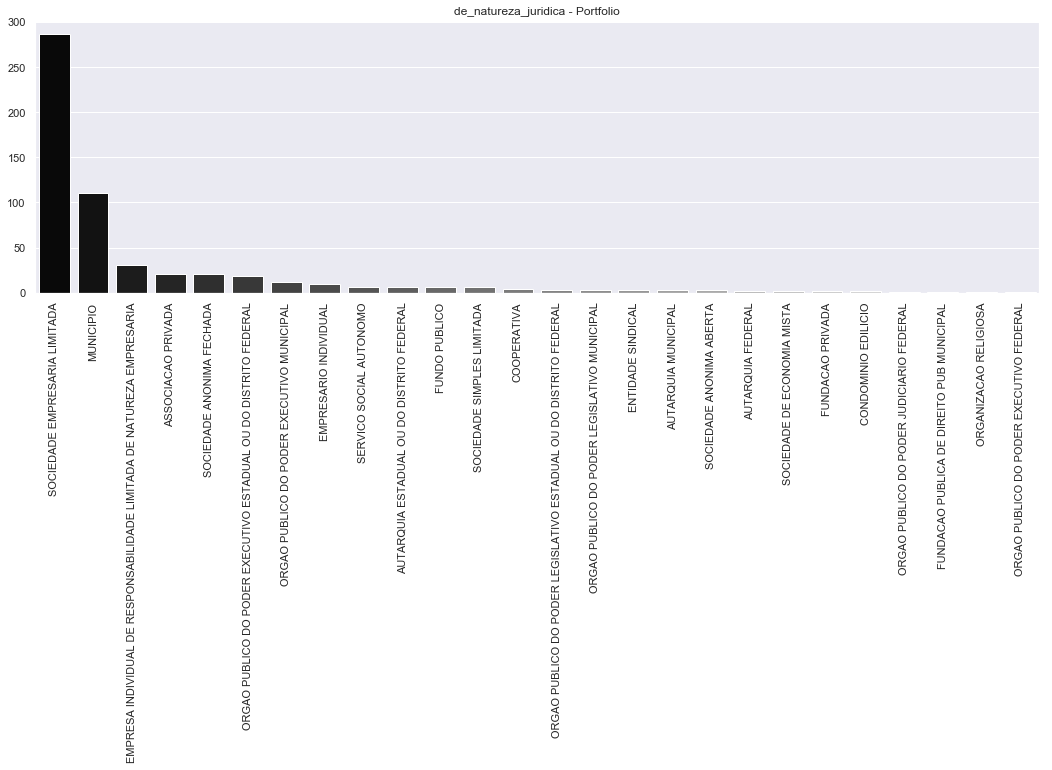

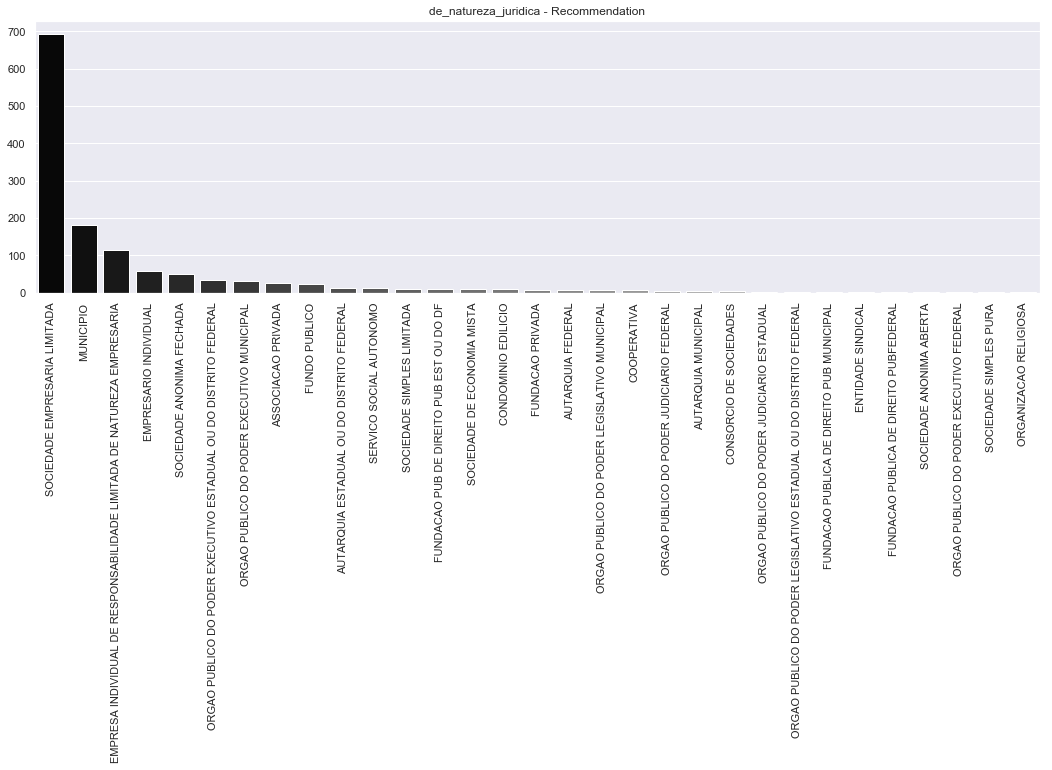

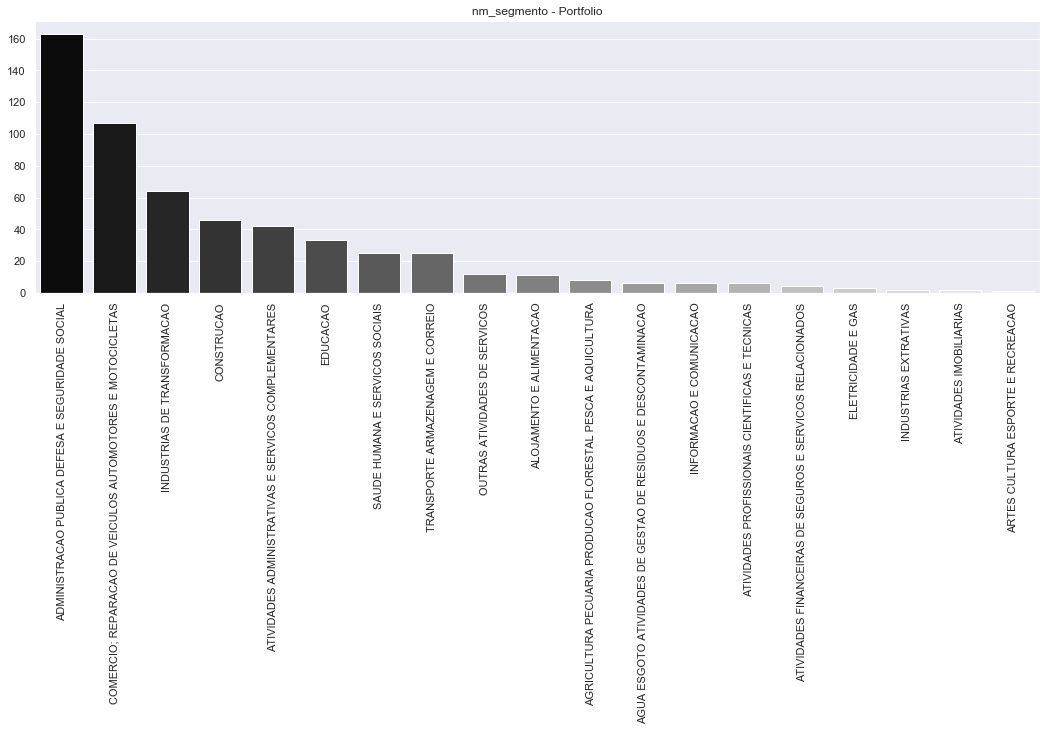

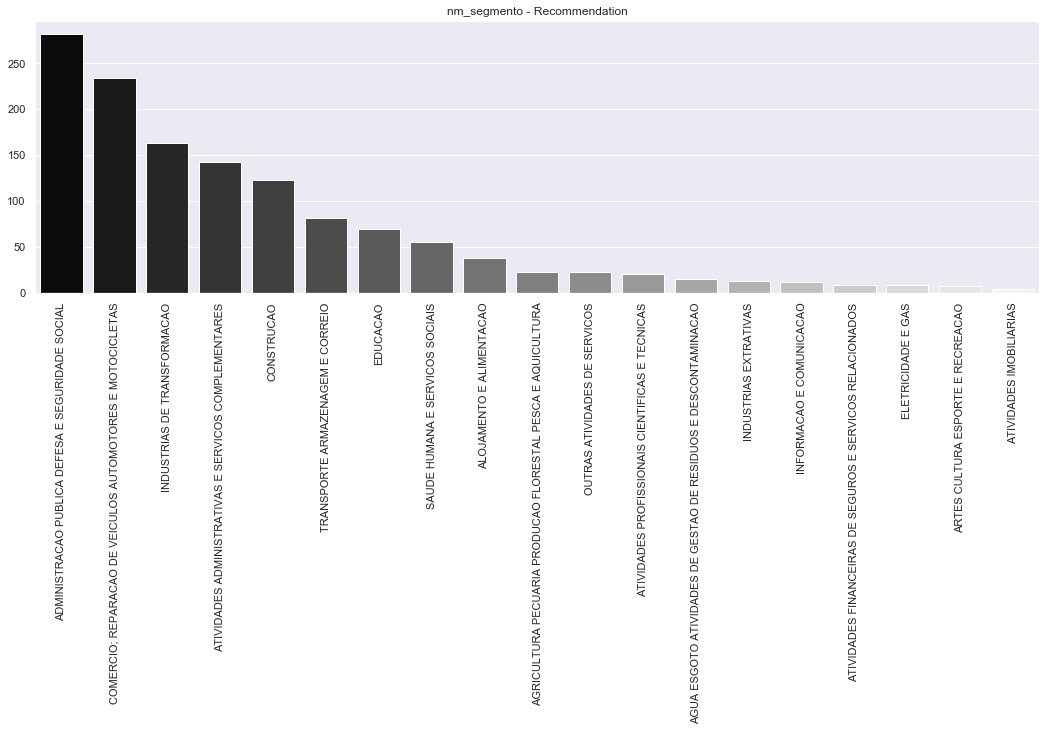

In [34]:
sns.set()
f, axes= plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(data=portfolio_original, x="sg_uf", palette = 'gist_gray', order = portfolio_original['sg_uf'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("sg_uf - Portfolio")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=recomendation_with_original_data, x="sg_uf", palette = 'gist_gray', order = recomendation_with_original_data['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf - Recommendation")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_original, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_original['idade_emp_cat'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("idade_emp_cat - Portfolio")
plt.xticks(rotation=90)
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=recomendation_with_original_data, x="idade_emp_cat", palette = 'gist_gray', order = recomendation_with_original_data['idade_emp_cat'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("idade_emp_cat - Recommendation")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")


sns.countplot(data=portfolio_original, x="setor", palette = 'gist_gray', order = portfolio_original['setor'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("setor - Portfolio")

axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=recomendation_with_original_data, x="setor", palette = 'gist_gray', order = recomendation_with_original_data['setor'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("setor - Recommendation")
plt.xticks(rotation=0)
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="nm_meso_regiao", palette = 'gist_gray', order = portfolio_original['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Portfolio")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recomendation_with_original_data, x="nm_meso_regiao", palette = 'gist_gray', order = recomendation_with_original_data['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Recommendation")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = portfolio_original['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recomendation_with_original_data, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = recomendation_with_original_data['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="qt_filiais", palette = 'gist_gray', order = portfolio_original['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recomendation_with_original_data, x="qt_filiais", palette = 'gist_gray', order = recomendation_with_original_data['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_original['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recomendation_with_original_data, x="natureza_juridica_macro", palette = 'gist_gray', order = recomendation_with_original_data['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_original['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recomendation_with_original_data, x="de_natureza_juridica", palette = 'gist_gray', order = recomendation_with_original_data['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="nm_segmento", palette = 'gist_gray', order = portfolio_original['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recomendation_with_original_data, x="nm_segmento", palette = 'gist_gray', order = recomendation_with_original_data['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()


## Verify similar features values:

In [35]:
boolean_values = [True, False]
# Verify similarity between recommendation full values and portfolio values
similar_features_rf = pd.DataFrame(index = boolean_values)
similar_features_rf['idade_empresa_anos'] = recomendation_with_original_data['idade_empresa_anos'].between(portfolio_original['idade_empresa_anos'].min(), portfolio_original['idade_empresa_anos'].max(), inclusive=True).value_counts()
similar_features_rf['idade_emp_cat'] = recomendation_with_original_data['idade_emp_cat'].isin((portfolio_original['idade_emp_cat'].unique())).value_counts()
similar_features_rf['de_natureza_juridica'] = recomendation_with_original_data['de_natureza_juridica'].isin((portfolio_original['de_natureza_juridica'].unique())).value_counts()
similar_features_rf['sg_uf'] = recomendation_with_original_data['sg_uf'].isin((portfolio_original['sg_uf'].unique())).value_counts()
similar_features_rf['natureza_juridica_macro'] = recomendation_with_original_data['natureza_juridica_macro'].isin((portfolio_original['natureza_juridica_macro'].unique())).value_counts()
similar_features_rf['de_ramo'] = recomendation_with_original_data['de_ramo'].isin((portfolio_original['de_ramo'].unique())).value_counts()
similar_features_rf['fl_rm'] = recomendation_with_original_data['fl_rm'].isin((portfolio_original['fl_rm'].unique())).value_counts()
similar_features_rf['fl_matriz'] = recomendation_with_original_data['fl_matriz'].isin((portfolio_original['fl_matriz'].unique())).value_counts()
similar_features_rf['fl_me'] = recomendation_with_original_data['fl_me'].isin((portfolio_original['fl_me'].unique())).value_counts()
similar_features_rf['fl_sa'] = recomendation_with_original_data['fl_sa'].isin((portfolio_original['fl_sa'].unique())).value_counts()
similar_features_rf['fl_epp'] = recomendation_with_original_data['fl_epp'].isin((portfolio_original['fl_epp'].unique())).value_counts()
similar_features_rf['fl_mei'] = recomendation_with_original_data['fl_mei'].isin((portfolio_original['fl_mei'].unique())).value_counts()
similar_features_rf['fl_ltda'] = recomendation_with_original_data['fl_ltda'].isin((portfolio_original['fl_ltda'].unique())).value_counts()
similar_features_rf['fl_st_especial'] = recomendation_with_original_data['fl_st_especial'].isin((portfolio_original['fl_st_especial'].unique())).value_counts()
similar_features_rf['fl_email'] = recomendation_with_original_data['fl_mei'].isin((portfolio_original['fl_email'].unique())).value_counts()
similar_features_rf['fl_telefone'] = recomendation_with_original_data['fl_telefone'].isin((portfolio_original['fl_telefone'].unique())).value_counts()
similar_features_rf['nm_segmento'] = recomendation_with_original_data['nm_segmento'].isin((portfolio_original['nm_segmento'].unique())).value_counts()
similar_features_rf['nm_meso_regiao'] = recomendation_with_original_data['nm_meso_regiao'].isin((portfolio_original['nm_meso_regiao'].unique())).value_counts()
similar_features_rf['de_faixa_faturamento_estimado_grupo'] = recomendation_with_original_data['de_faixa_faturamento_estimado_grupo'].isin((portfolio_original['de_faixa_faturamento_estimado_grupo'].unique())).value_counts()
similar_features_rf['qt_filiais'] = recomendation_with_original_data['qt_filiais'].between(portfolio_original['qt_filiais'].min(), portfolio_original['qt_filiais'].max(), inclusive=True).value_counts()
similar_features_rf = similar_features_rf.fillna('0')
similar_features_rf

,idade_empresa_anos,idade_emp_cat,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,fl_rm,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,nm_segmento,nm_meso_regiao,de_faixa_faturamento_estimado_grupo,qt_filiais
True,946,946,1305,1324,1324,1322,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,1320,1216,1322
False,378,378,19,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,108,2


***
> ***
***
# Extras: 

## Recomendation filtered by portfolio values:

In [36]:
# Filter recommendation
recommendation_full_filtered = pd.DataFrame()
recommendation_full_filtered = recomendation_with_original_data[recomendation_with_original_data['de_natureza_juridica'].isin(portfolio_original['de_natureza_juridica'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['sg_uf'].isin(portfolio_original['sg_uf'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['natureza_juridica_macro'].isin(portfolio_original['natureza_juridica_macro'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['de_ramo'].isin(portfolio_original['de_ramo'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['idade_emp_cat'].isin(portfolio_original['idade_emp_cat'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_rm'].isin(portfolio_original['fl_rm'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_matriz'].isin(portfolio_original['fl_matriz'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_me'].isin(portfolio_original['fl_me'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_sa'].isin(portfolio_original['fl_sa'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_epp'].isin(portfolio_original['fl_epp'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_mei'].isin(portfolio_original['fl_mei'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_ltda'].isin(portfolio_original['fl_ltda'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_st_especial'].isin(portfolio_original['fl_st_especial'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_email'].isin(portfolio_original['fl_email'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_telefone'].isin(portfolio_original['fl_telefone'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['qt_filiais'].between(portfolio_original['qt_filiais'].min(), portfolio_original['qt_filiais'].max(), inclusive=True) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['idade_empresa_anos'].between(portfolio_original['idade_empresa_anos'].min(), portfolio_original['idade_empresa_anos'].max(), inclusive=True) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['nm_segmento'].isin(portfolio_original['nm_segmento'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['nm_meso_regiao'].isin(portfolio_original['nm_meso_regiao'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['de_faixa_faturamento_estimado_grupo'].isin(portfolio_original['de_faixa_faturamento_estimado'].unique()) == True]
recommendation_full_filtered.head(3)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
123,123,6e292487550f4b68a5a710b1512039761b07cdb9d1125728af3e601076c8946b,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.876712,> 20,False,Fals

In [37]:
# Companies in recommendation_full after filter
recommendation_full_filtered.shape[0]

858

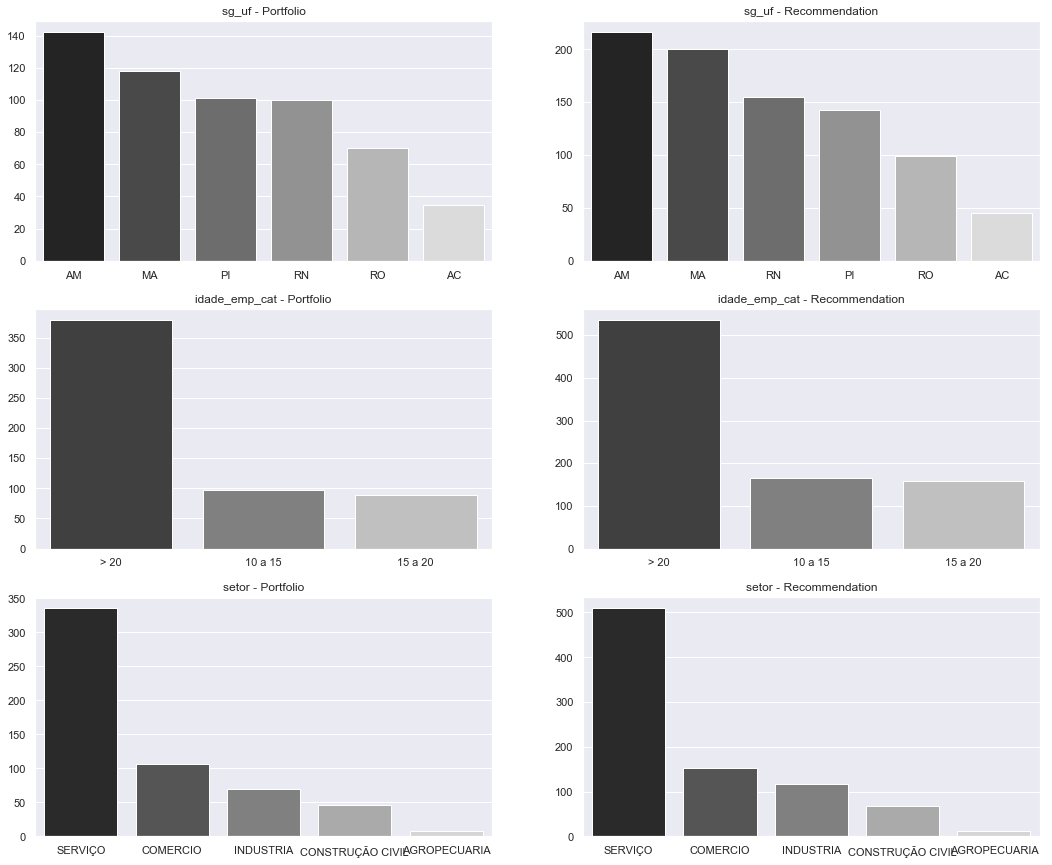

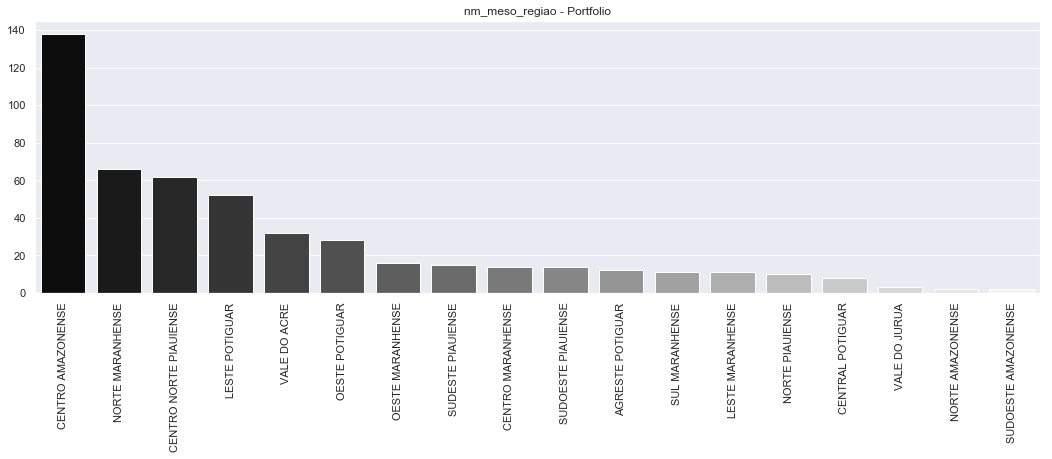

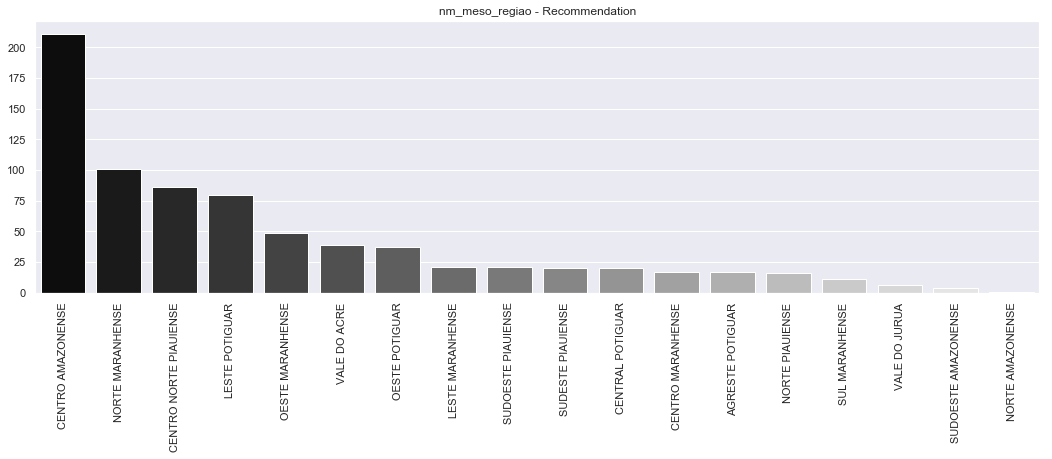

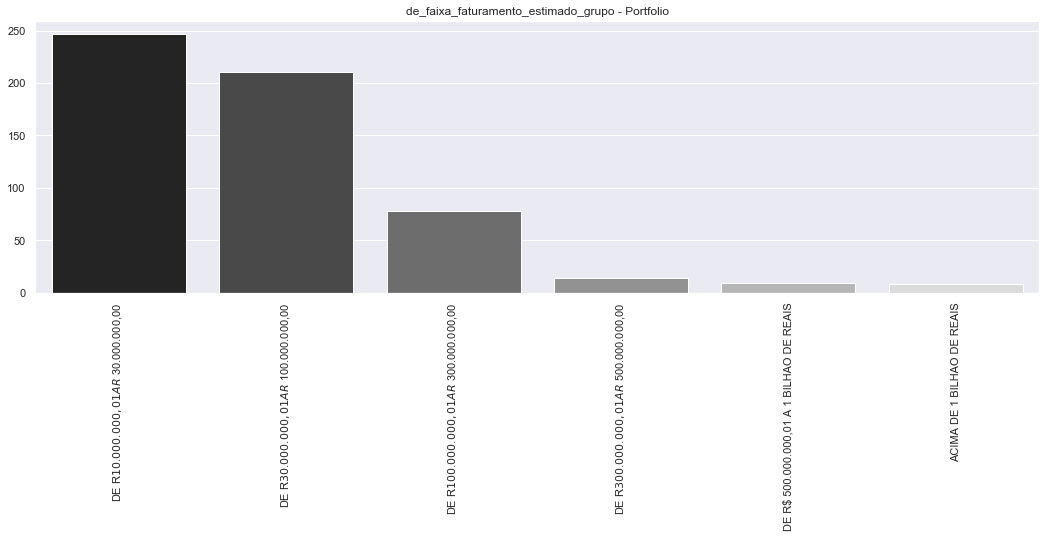

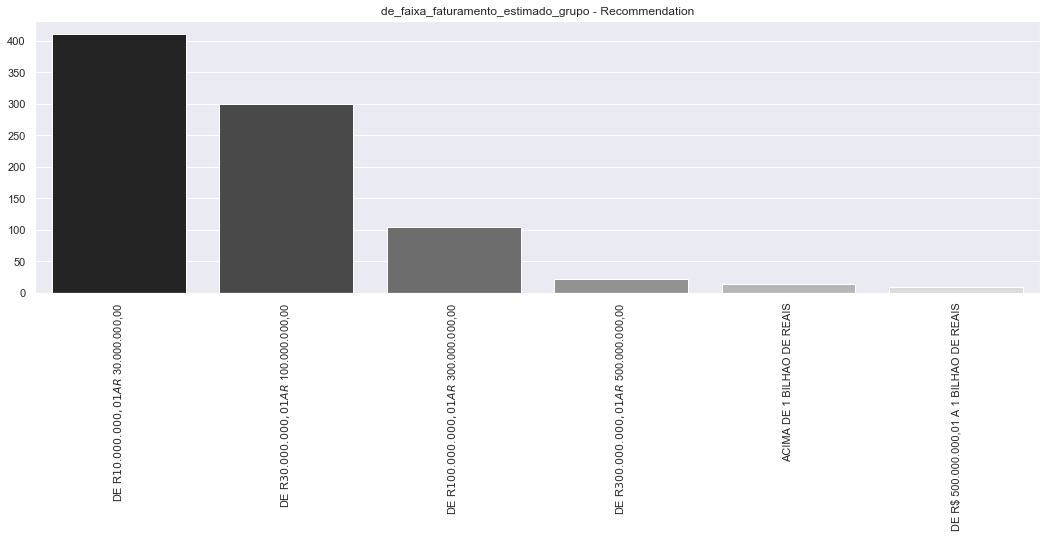

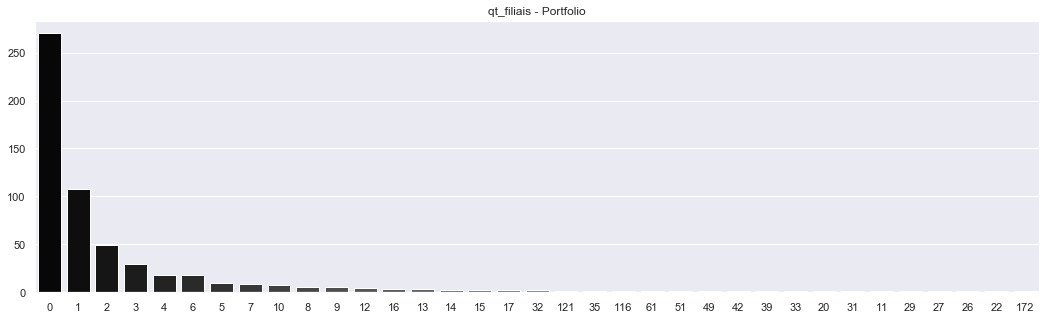

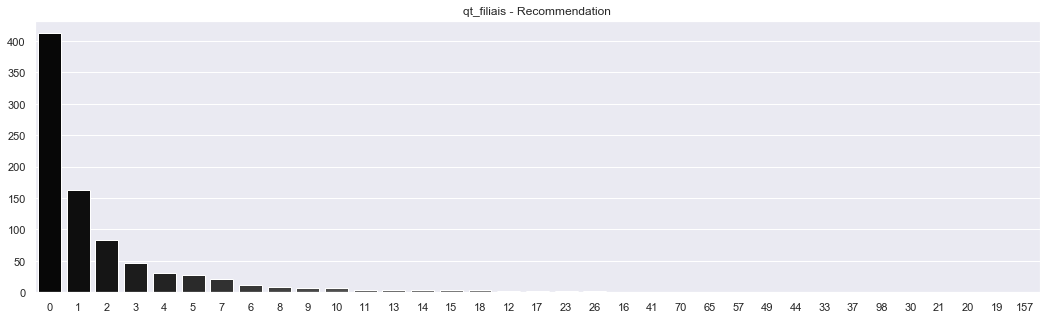

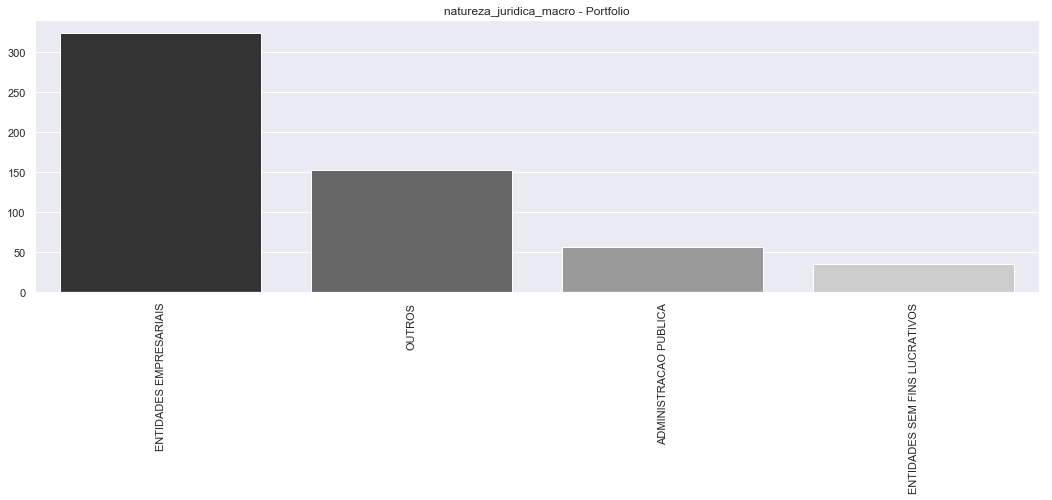

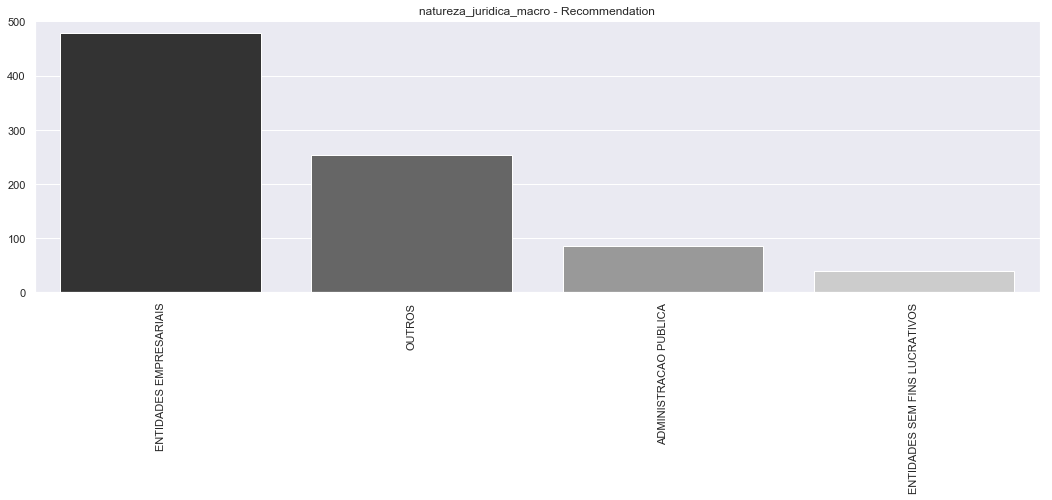

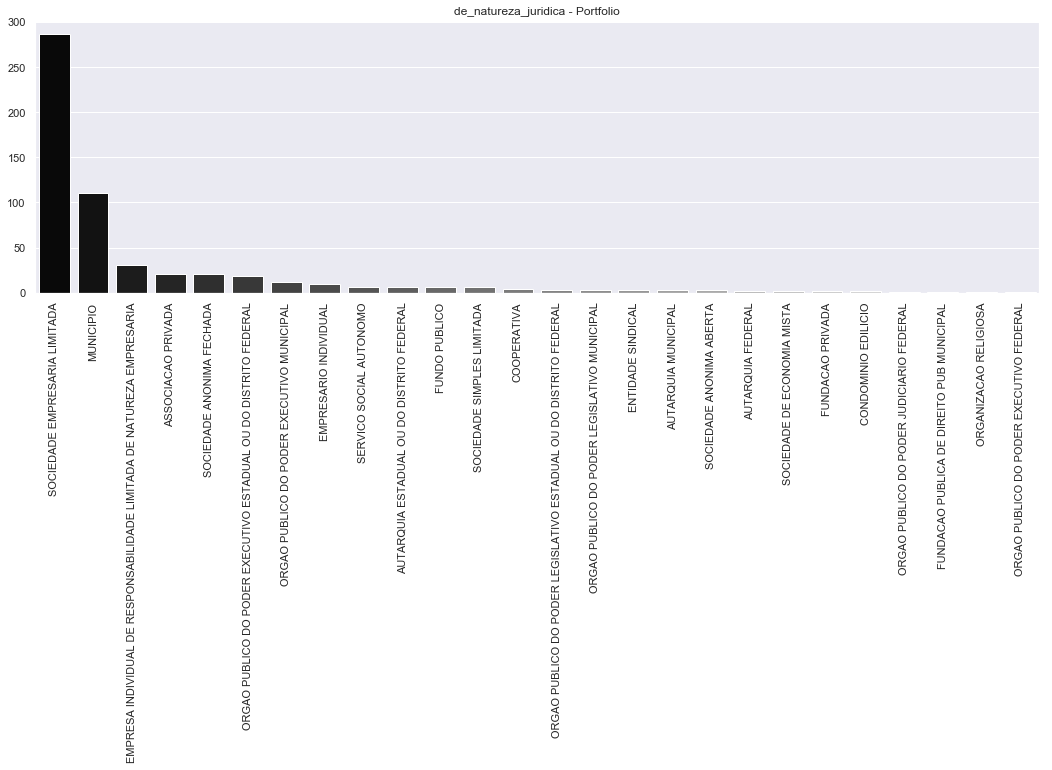

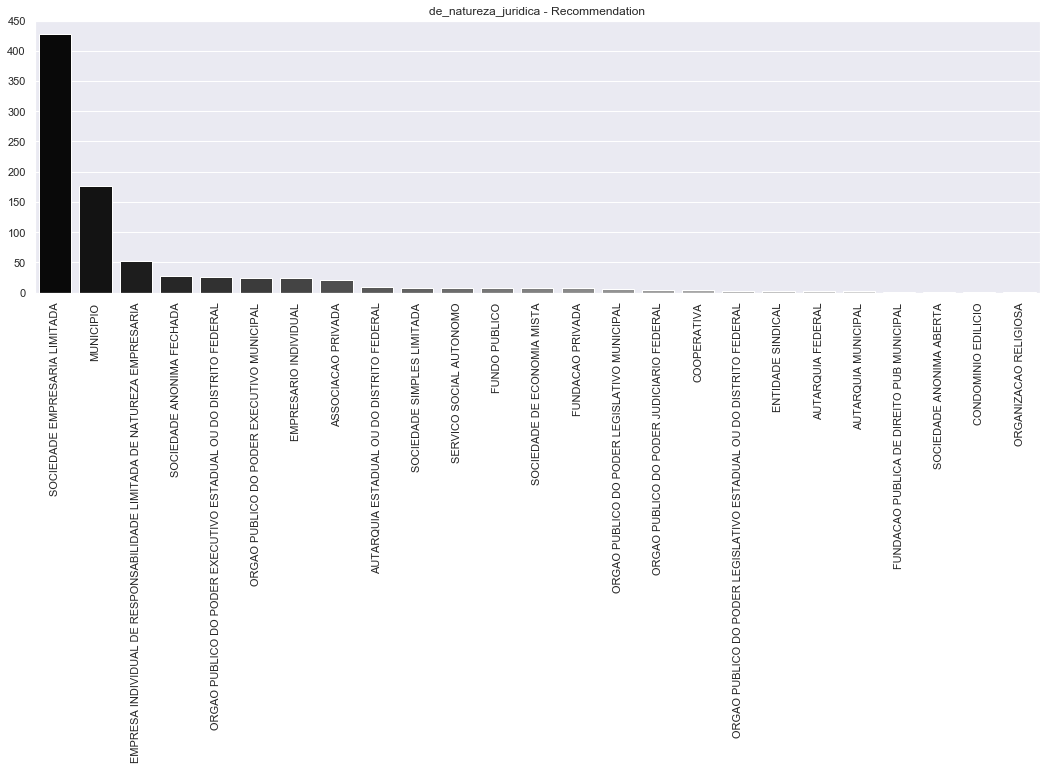

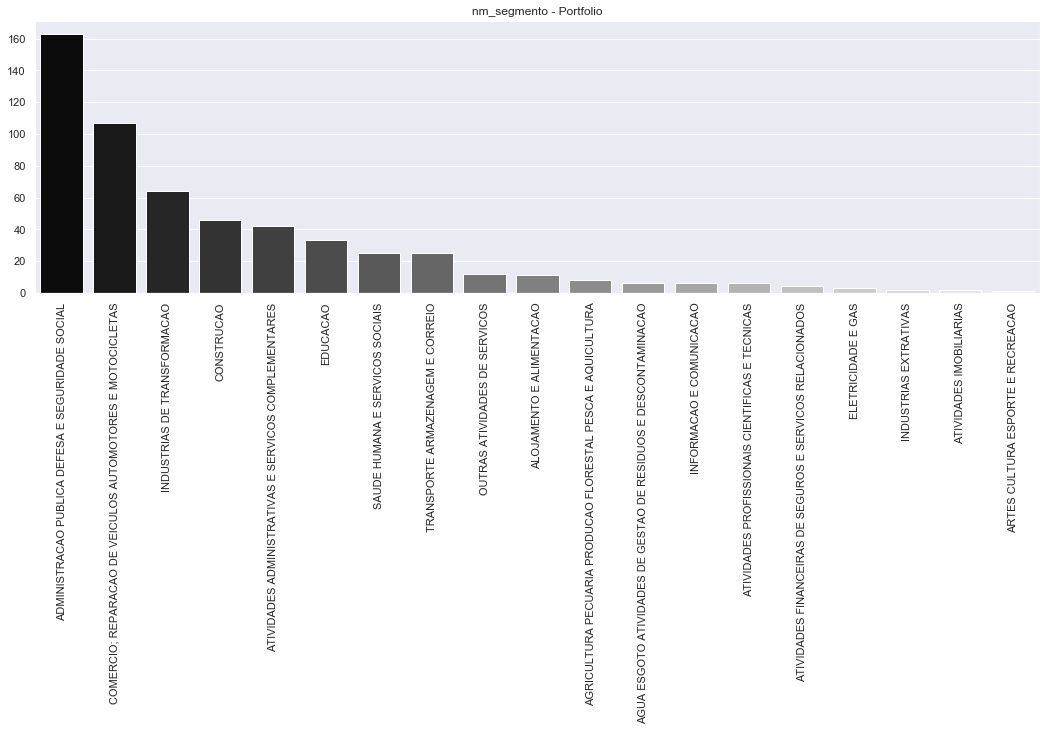

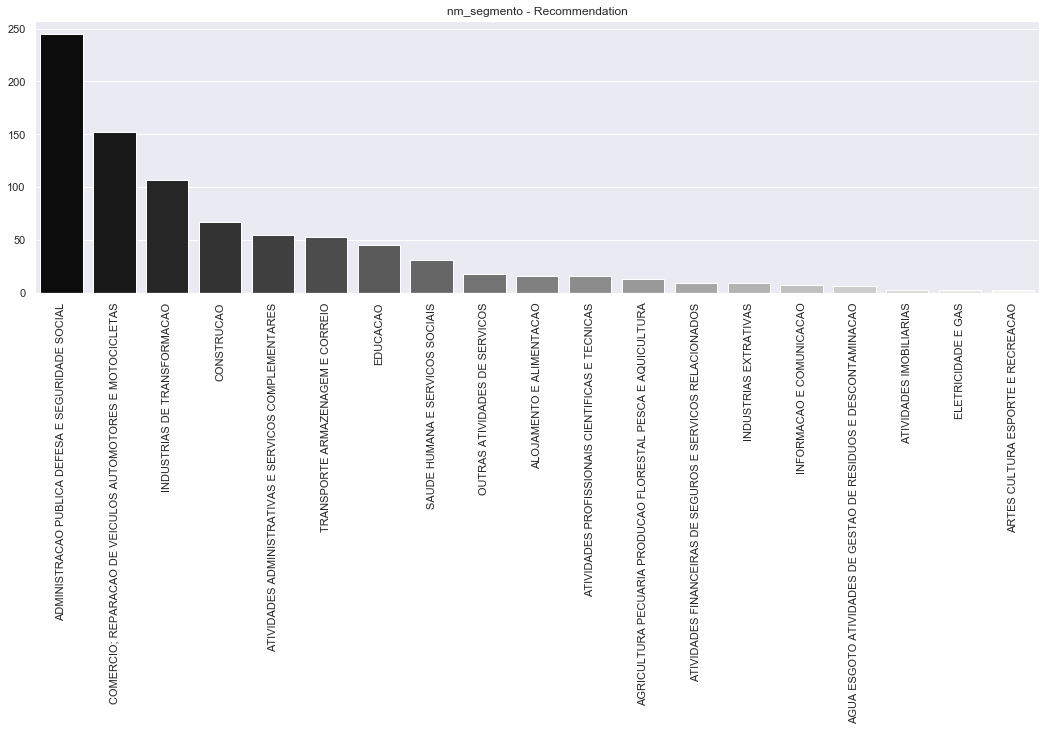

In [38]:
# Graphs:
sns.set()
f, axes= plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(data=portfolio_original, x="sg_uf", palette = 'gist_gray', order = portfolio_original['sg_uf'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("sg_uf - Portfolio")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=recommendation_full_filtered, x="sg_uf", palette = 'gist_gray', order = recommendation_full_filtered['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf - Recommendation")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_original, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_original['idade_emp_cat'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("idade_emp_cat - Portfolio")
plt.xticks(rotation=90)
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=recommendation_full_filtered, x="idade_emp_cat", palette = 'gist_gray', order = recommendation_full_filtered['idade_emp_cat'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("idade_emp_cat - Recommendation")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")


sns.countplot(data=portfolio_original, x="setor", palette = 'gist_gray', order = portfolio_original['setor'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("setor - Portfolio")

axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=recommendation_full_filtered, x="setor", palette = 'gist_gray', order = recommendation_full_filtered['setor'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("setor - Recommendation")
plt.xticks(rotation=0)
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="nm_meso_regiao", palette = 'gist_gray', order = portfolio_original['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Portfolio")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="nm_meso_regiao", palette = 'gist_gray', order = recommendation_full_filtered['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Recommendation")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = portfolio_original['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = recommendation_full_filtered['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="qt_filiais", palette = 'gist_gray', order = portfolio_original['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="qt_filiais", palette = 'gist_gray', order = recommendation_full_filtered['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_original['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="natureza_juridica_macro", palette = 'gist_gray', order = recommendation_full_filtered['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_original['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="de_natureza_juridica", palette = 'gist_gray', order = recommendation_full_filtered['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_original, x="nm_segmento", palette = 'gist_gray', order = portfolio_original['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="nm_segmento", palette = 'gist_gray', order = recommendation_full_filtered['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

***
## Companies with tax, legal, financial or operational issues:

In [39]:
# features to check:
dictionary.loc[dictionary['Coluna'].isin(['fl_st_especial', 'fl_simples_irregular', 'de_saude_tributaria', 'de_nivel_atividade'])]

,Coluna,Tipo,Descrição
14,fl_st_especial,boolean value,true if dt_situacao_especial is not null. If it is not null means that some extraordinary situation is identified by the IRS (*ESPOLIO DE EMPRESARIO EMPRESA INDIVIDUAL OU EIRELI | *FALIDO | *EM LIQUIDACAO | *LIQUIDACAO JUDICIAL | *LIQUIDACAO EXTRA JUDICIAL | *REGISTRO NA JUNTA COMERCIAL EM ANDAMENTO | *EM LIQUID EXTRA JUDICIAL | *RECUPERACAO JUDICIAL | *INTERVENCAO*)
36,de_saude_tributaria,character,indicator of health tax status | Green if all tax are OK | Red if none are OK
39,de_nivel_atividade,character,probability of being operating | ALTA high probality | BAIXA | low probality.
41,fl_simples_irregular,boolean,true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.


> ### Companies with issues in Portfolio

In [40]:
# fl_st_especial
portfolio_original['fl_st_especial'].value_counts()

False    564
True     2  
Name: fl_st_especial, dtype: int64

In [41]:
# fl_simples_irregular
portfolio_original['fl_simples_irregular'].value_counts()

False    565
True     1  
Name: fl_simples_irregular, dtype: int64

In [42]:
# de_saude_tributaria
portfolio_original['de_saude_tributaria'].value_counts()

VERDE       376
AZUL        134
LARANJA     44 
VERMELHO    11 
AMARELO     1  
Name: de_saude_tributaria, dtype: int64

In [43]:
# de_nivel_atividade
portfolio_original['de_nivel_atividade'].value_counts()

ALTA     523
MEDIA    37 
BAIXA    6  
Name: de_nivel_atividade, dtype: int64

In [44]:
# Dataset Portfolio issues: 
portfolio_not_issues = pd.DataFrame()
portfolio_not_issues = portfolio_original[portfolio_original['fl_st_especial'] != True]
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['fl_simples_irregular'] != True]
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_saude_tributaria'] != 'VERMELHO']
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_nivel_atividade'] != 'BAIXA']
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_nivel_atividade'] != 'MUITO BAIXA']
portfolio_issues = pd.DataFrame(portfolio_original['id'])
portfolio_issues['Tr_exc'] = portfolio_issues['id'].isin(portfolio_not_issues['id'])
portfolio_issues = portfolio_issues[portfolio_issues['Tr_exc'] != True]
portfolio_issues = portfolio_issues.drop(['Tr_exc'], axis = 1)
portfolio_issues = pd.merge(portfolio_issues, market_original, on='id', how='left')
portfolio_issues.head(3)

,id,Unnamed: 0,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,f081e5c6355d6ae432cb62330fc4108a39616f1bf3d2623011b8b647a3620cec,36202,True,SOCIEDADE ANONIMA FECHADA,RN,ENTIDADES EMPRESARIAIS,SERVICOS DE SAUDE,SERVIÇO,21.832877,> 20,False,True,F

In [45]:
# Companies with problems in portfolio
portfolio_issues.shape[0]

20

> ### Companies with issues in Recomendation_full

In [46]:
# fl_st_especial
recomendation_with_original_data['fl_st_especial'].value_counts()

False    1322
True     2   
Name: fl_st_especial, dtype: int64

In [47]:
# fl_simples_irregular
recomendation_with_original_data['fl_simples_irregular'].value_counts()

False    1320
True     4   
Name: fl_simples_irregular, dtype: int64

In [48]:
# de_saude_tributaria
recomendation_with_original_data['de_saude_tributaria'].value_counts()

VERDE       835
AZUL        380
LARANJA     81 
VERMELHO    21 
CINZA       7  
Name: de_saude_tributaria, dtype: int64

In [49]:
# de_nivel_atividade
recomendation_with_original_data['de_nivel_atividade'].value_counts()

ALTA     1214
MEDIA    99  
BAIXA    11  
Name: de_nivel_atividade, dtype: int64

In [50]:
# Dataset recommendation_full issues: 
recomendation_with_original_data_not_issues = pd.DataFrame()
recomendation_with_original_data_not_issues = recomendation_with_original_data[recomendation_with_original_data['fl_st_especial'] != True]
recomendation_with_original_data_not_issues = recomendation_with_original_data_not_issues[recomendation_with_original_data_not_issues['fl_simples_irregular'] != True]
recomendation_with_original_data_not_issues = recomendation_with_original_data_not_issues[recomendation_with_original_data_not_issues['de_saude_tributaria'] != 'VERMELHO']
recomendation_with_original_data_not_issues = recomendation_with_original_data_not_issues[recomendation_with_original_data_not_issues['de_nivel_atividade'] != 'BAIXA']
recomendation_with_original_data_not_issues = recomendation_with_original_data_not_issues[recomendation_with_original_data_not_issues['de_nivel_atividade'] != 'MUITO BAIXA']
recomendation_with_original_data_issues = pd.DataFrame(recomendation_with_original_data['id'])
recomendation_with_original_data_issues['Tr_exc'] = recomendation_with_original_data_issues['id'].isin(recomendation_with_original_data_not_issues['id'])
recomendation_with_original_data_issues = recomendation_with_original_data_issues[recomendation_with_original_data_issues['Tr_exc'] != True]
recomendation_with_original_data_issues = recomendation_with_original_data_issues.drop(['Tr_exc'], axis = 1)
recomendation_with_original_data_issues = pd.merge(recomendation_with_original_data_issues, market_original, on='id', how='left')
recomendation_with_original_data_issues.head(3)

,id,Unnamed: 0,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,71a4c55b3bfa2549b0e1c73e689a8ca306ed9ee18e93ede1082eebf88c1e8632,4021,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,52.005

In [51]:
# Companies with problems in recommendation_full
recomendation_with_original_data_issues.shape[0]

37

***
> ***
***

## All Outputs:

In [52]:
# Uncomment and run this cell to export the dataset to csv.


# Recomendation with values used in the model:
##recomendation.to_csv('recomendation.csv', index=False)

# Recomendation with original data:
##recomendation_with_original_data.to_csv('recomendation_with_original_data.csv', index=False)

# Recommendation_ids
##recommendation_ids.to_csv('recommendation_ids.csv', index=False)

# Top25_recommendations:
##top25_recommendations_ids.to_csv('top25_recommendations_ids.csv', index=False)

# Output to Cross-Ranking
##rec_sys_output.to_csv('rec_port2_diego.csv', index=False)


# Full Recommendation filtered by portfolio values:
##recommendation_full_filtered.to_csv('recommendation_full_filtered.csv', index=False)


# Portfolio companies with issues
##portfolio_issues.to_csv('portfolio_issues.csv', index=False)


# Companies in full recomendation with issues:
##recomendation_with_original_data_issues.to_csv('recomendation_with_original_data_issues.csv', index=False)

***
> ***
***